In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.io import loadmat

In [2]:
Data_corr = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/EL_data_filtered.csv')
Data_no_corr = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/EL_data_all.csv')

In [3]:
Data_corr.head()

,name,series,panel_id,row,col,width,height,GS_mean
0,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_1,1,10_4081,10,1,323,323,0.494703
1,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_2,1,10_4081,10,2,324,323,0.426713
2,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_3,1,10_4081,10,3,325,323,0.535716
3,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_4,1,10_4081,10,4,324,323,0.476981
4,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_5,1,10_4081,10,5,323,323,0.468487


In [4]:
Data_no_corr.head()

,name,series,panel_id,row,col,width,height,GS_mean
0,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_1,1,10_4081,10,1,323,323,0.494703
1,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_2,1,10_4081,10,2,324,323,0.426713
2,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_3,1,10_4081,10,3,325,323,0.535716
3,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_4,1,10_4081,10,4,324,323,0.476981
4,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_5,1,10_4081,10,5,323,323,0.468487


In [5]:
len(Data_corr),len(Data_no_corr)

(36061, 36564)

# Check the before and after count of labels

In [6]:
Data_corr.groupby('Label').count().sum()

KeyError: 'Label'

In [ ]:
Data_no_corr.groupby('Label').count().sum()

In [7]:
dat_no_corr_count = Data_no_corr.groupby('Label').count().loc[['Crack A','Crack B','Crack C','Finger Failure']]
dat_no_corr_count.reset_index(inplace=True)

dat_corr_count = Data_corr.groupby('Label').count().loc[['CrackA','CrackB','CrackC','FingerFailure']]
dat_corr_count.reset_index(inplace=True)

# merge them and create a new variable indicating the dataset
dat_corr_count['Dataset'] = 'Before'
dat_no_corr_count['Dataset'] = 'After'

#Rename the labels of Data_corr such that CrackA = Crack A
dat_corr_count['Label'] = dat_corr_count['Label'].str.replace('CrackA', 'Crack A')
dat_corr_count['Label'] = dat_corr_count['Label'].str.replace('CrackB', 'Crack B')
dat_corr_count['Label'] = dat_corr_count['Label'].str.replace('CrackC', 'Crack C')
dat_corr_count['Label'] = dat_corr_count['Label'].str.replace('FingerFailure', 'Finger Failure')

#merge the two datasets
dat_count = pd.concat([dat_corr_count, dat_no_corr_count], axis=0)

In [8]:
dat_count

,Label,Unnamed: 0,ImageDir,MaskDir,Dataset
0,Crack A,89.0,89,89,Before
1,Crack B,120.0,120,120,Before
2,Crack C,79.0,79,79,Before
3,Finger Failure,312.0,312,312,Before
0,Crack A,NaN,335,335,After
1,Crack B,NaN,470,470,After
2,Crack C,NaN,247,247,After
3,Finger Failure,NaN,1000,1000,After


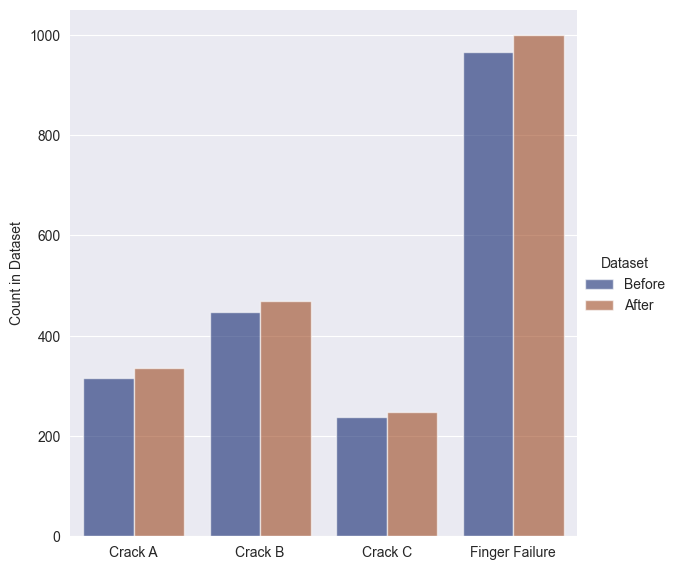

In [54]:
# Plot histogram of the data before and after with overlay
g = sns.catplot(
    data=dat_count,
    kind="bar",
    x="Label",
    y="ImageDir",
    hue="Dataset",
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6
)

g.despine(left=True)
g.set_axis_labels("", "Count in Dataset")
#g.legend.set_title("Before and after correction")

# Stats for report 

In [7]:
train = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Train.csv')
val = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Val.csv')
test = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Test.csv')

In [8]:
len(train)+len(val)+len(test)

36052

In [9]:
data = pd.concat([train,val,test])

In [10]:
import ast
converters = {'Label': lambda x: ast.literal_eval(x)}

In [12]:
len(data),len(Data_corr)

(36052, 36061)

In [13]:
Data = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/DataSetVitusStats.csv', converters=converters)

In [14]:
Data.is_fault.sum()

1000

In [15]:
Data.explode('Label').groupby('Label').count()

,ImageDir,MaskDir,is_fault
Label,,,
CrackA,248,248,248
CrackB,341,341,341
CrackC,161,161,161
FingerFailure,708,708,708
Negative,35052,0,35052


In [16]:
Data.explode('Label').groupby('Label').count()['is_fault'].sum()

36510

In [17]:
len(Data[Data['is_fault'] == 0])

35052

In [18]:
Data['is_fault'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
36047    False
36048    False
36049    False
36050    False
36051    False
Name: is_fault, Length: 36052, dtype: bool

In [19]:
train = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/TrainVitusStat.csv', converters=converters)
val = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/ValVitusStat.csv', converters=converters)
test = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/TestVitusStat.csv', converters=converters)

In [20]:
train.explode('Label').groupby('Label').count()

,Unnamed: 0,ImageDir,MaskDir,is_fault,main_lab
Label,,,,,
CrackA,148,148,148,148,148
CrackB,217,217,217,217,217
CrackC,99,99,99,99,99
FingerFailure,415,415,415,415,415
Negative,21031,21031,0,21031,21031


In [23]:
train.is_fault.sum()

600

In [17]:
val.explode('Label').groupby('Label').count()

,Unnamed: 0,ImageDir,MaskDir,is_fault,main_lab
Label,,,,,
CrackA,55,55,55,55,55
CrackB,67,67,67,67,67
CrackC,30,30,30,30,30
FingerFailure,124,124,124,124,124
Negative,7011,7011,0,7011,7011


In [24]:
val.is_fault.sum()

200

In [18]:
test.explode('Label').groupby('Label').count()

,Unnamed: 0,ImageDir,MaskDir,is_fault,main_lab
Label,,,,,
CrackA,45,45,45,45,45
CrackB,57,57,57,57,57
CrackC,32,32,32,32,32
FingerFailure,169,169,169,169,169
Negative,7010,7010,0,7010,7010


In [25]:
test.is_fault.sum()

200

## Before sorting

In [37]:
all_panels = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/EL_data_all.csv')

In [35]:
len(all_panels)

36564

In [37]:
all_panels['panel_id'].unique().shape

(585,)

In [43]:
s = f'Max image width: {all_panels.width.max()}\nMin Image width: {all_panels.width.min()}'
print(s)

Max image width: 424
Min Image width: 252


In [45]:
s = f'Max image width: {all_panels.height.max()}\nMin Image width: {all_panels.height.min()}'
print(s)

Max image width: 427
Min Image width: 6


In [44]:
all_panels

,name,series,panel_id,row,col,width,height,GS_mean
0,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_1,1,10_4081,10,1,323,323,0.494703
1,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_2,1,10_4081,10,2,324,323,0.426713
2,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_3,1,10_4081,10,3,325,323,0.535716
3,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_4,1,10_4081,10,4,324,323,0.476981
4,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_5,1,10_4081,10,5,323,323,0.468487
...,...,...,...,...,...,...,...,...
36559,Serie_6_ImageCorr_-9_4283_PC_Cell_Row9_Col_2,6,9_4283,9,2,302,300,0.415072
36560,Serie_6_ImageCorr_-9_4283_PC_Cell_Row9_Col_3,6,9_4283,9,3,302,300,0.550505
36561,Serie_6_ImageCorr_-9_4283_PC_Cell_Row9_Col_4,6,9_4283,9,4,302,300,0.638767
36562,Serie_6_ImageCorr_-9_4283_PC_Cell_Row9_Col_5,6,9_4283,9,5,303,300,0.523925


In [38]:
Data_corr = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/EL_data_all.csv')


In [39]:
Data_corr

,name,series,panel_id,row,col,width,height,GS_mean
0,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_1,1,10_4081,10,1,323,323,0.494703
1,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_2,1,10_4081,10,2,324,323,0.426713
2,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_3,1,10_4081,10,3,325,323,0.535716
3,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_4,1,10_4081,10,4,324,323,0.476981
4,Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_5,1,10_4081,10,5,323,323,0.468487
...,...,...,...,...,...,...,...,...
36559,Serie_6_ImageCorr_-9_4283_PC_Cell_Row9_Col_2,6,9_4283,9,2,302,300,0.415072
36560,Serie_6_ImageCorr_-9_4283_PC_Cell_Row9_Col_3,6,9_4283,9,3,302,300,0.550505
36561,Serie_6_ImageCorr_-9_4283_PC_Cell_Row9_Col_4,6,9_4283,9,4,302,300,0.638767
36562,Serie_6_ImageCorr_-9_4283_PC_Cell_Row9_Col_5,6,9_4283,9,5,303,300,0.523925


In [40]:
Data_corr['panel_id'].unique().shape

(585,)

In [41]:
len(Data_corr)

36564

## Collected set

In [23]:
base = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Serier'

In [24]:
name = Data_corr.loc[0]['name']
serie = Data_corr.loc[0]['series']

In [25]:
def load_mat_file(row):
    base = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Serier'
    name = row['name']
    serie = row['series']
    directory = f'{base}/Series{serie}/MaskGT/GT_{name}.mat'
    directory = directory.replace('ImageCorr','Image')
    return loadmat(directory)

In [26]:
def format_mat_file(mat):
    label = mat['GTLabel'].ravel()
    mask = mat['GTMask'].ravel()
    label = [l[0] for l in label]
    return label,mask

In [27]:
labels = []
masks = []
for idx,row in Data_corr.iterrows():
    try:
        mat = load_mat_file(row)
        label,mask = format_mat_file(mat)
        labels.append(label)
        masks.append(mask)
    except:
        labels.append(['Negative'])        

In [28]:
Data_corr['Labels'] = labels

In [29]:
Data_corr['instance_count'] = Data_corr['Labels'].apply(lambda x: len(x) if x[0] != 'Negative' else 0)

In [30]:
Data_corr['Finger Failure'] = Data_corr['Labels'].apply(lambda x: True if 'Finger Failure' in x else False)
Data_corr['Crack A'] = Data_corr['Labels'].apply(lambda x: True if 'Crack A' in x else False)
Data_corr['Crack B'] = Data_corr['Labels'].apply(lambda x: True if 'Crack B' in x else False)
Data_corr['Crack C'] = Data_corr['Labels'].apply(lambda x: True if 'Crack C' in x else False)

In [31]:
Data_corr.to_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/EkstraDetection/Corr_with_labels.csv')

In [32]:
d = Data_corr.groupby('instance_count').count()

In [33]:
d

,name,series,panel_id,row,col,width,height,GS_mean,Labels,Finger Failure,Crack A,Crack B,Crack C
instance_count,,,,,,,,,,,,,
0,34629,34629,34629,34629,34629,34629,34629,34629,34629,34629,34629,34629,34629
1,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146
2,155,155,155,155,155,155,155,155,155,155,155,155,155
3,58,58,58,58,58,58,58,58,58,58,58,58,58
4,27,27,27,27,27,27,27,27,27,27,27,27,27
5,16,16,16,16,16,16,16,16,16,16,16,16,16
6,12,12,12,12,12,12,12,12,12,12,12,12,12
7,9,9,9,9,9,9,9,9,9,9,9,9,9
8,4,4,4,4,4,4,4,4,4,4,4,4,4


In [34]:
Data_corr.groupby('Finger Failure').count()

,name,series,panel_id,row,col,width,height,GS_mean,Labels,instance_count,Crack A,Crack B,Crack C
Finger Failure,,,,,,,,,,,,,
False,35296,35296,35296,35296,35296,35296,35296,35296,35296,35296,35296,35296,35296
True,765,765,765,765,765,765,765,765,765,765,765,765,765


In [35]:
Data_corr['is_fault'] = Data_corr['instance_count'].apply(lambda x: 1 if x > 0 else 0)

In [36]:
Data_corr.is_fault.sum()

1432

#### Masks 

In [37]:
masks_means = [mask.sum() for mask in masks]

In [38]:
sum(masks_means)/len(masks_means)

7285.731145251397

(array([1.023e+03, 1.260e+02, 7.800e+01, 5.400e+01, 3.600e+01, 1.700e+01,
        1.100e+01, 1.100e+01, 7.000e+00, 1.200e+01, 3.000e+00, 7.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

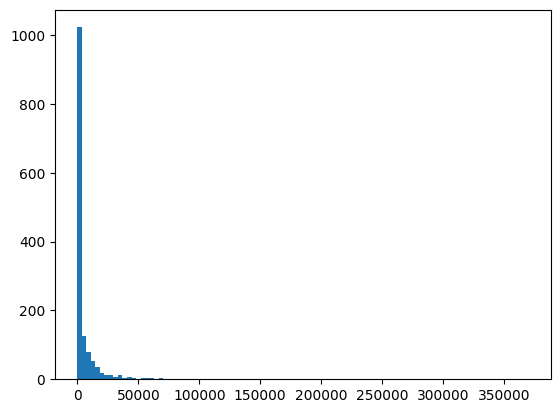

In [39]:
plt.hist(masks_means,bins = 100)

In [40]:
sums = np.array(masks_means)

In [41]:
np.median(sums)

1044.0

In [42]:
np.quantile(sums,[0.25,0.5,0.75])

array([ 223.5, 1044. , 4968.5])

## Counting with regards to panels

In [43]:
Data_corr.groupby('panel_id').count()

,name,series,row,col,width,height,GS_mean,Labels,instance_count,Finger Failure,Crack A,Crack B,Crack C,is_fault
panel_id,,,,,,,,,,,,,,
10_3943,72,72,72,72,72,72,72,72,72,72,72,72,72,72
10_4000,72,72,72,72,72,72,72,72,72,72,72,72,72,72
10_4010,72,72,72,72,72,72,72,72,72,72,72,72,72,72
10_4043,69,69,69,69,69,69,69,69,69,69,69,69,69,69
10_4056,71,71,71,71,71,71,71,71,71,71,71,71,71,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_4243,60,60,60,60,60,60,60,60,60,60,60,60,60,60
9_4254,60,60,60,60,60,60,60,60,60,60,60,60,60,60
9_4263,60,60,60,60,60,60,60,60,60,60,60,60,60,60


In [53]:
Data_corr.groupby(['panel_id','Crack A']).count()

name  series  row  col  width  height  GS_mean  Labels  \
panel_id Crack A                                                           
10_3943  False      72      72   72   72     72      72       72      72   
10_4000  False      72      72   72   72     72      72       72      72   
10_4010  False      72      72   72   72     72      72       72      72   
10_4043  False      69      69   69   69     69      69       69      69   
10_4056  False      71      71   71   71     71      71       71      71   
...                ...     ...  ...  ...    ...     ...      ...     ...   
9_4254   False      58      58   58   58     58      58       58      58   
         True        2       2    2    2      2       2        2       2   
9_4263   False      60      60   60   60     60      60       60      60   
9_4283   False      60      60   60   60     60      60       60      60   
9_4343   False      60      60   60   60     60      60       60      60   

                  instance_count  Finger Failure  Crack B  Crack C  is_fault  
panel_id Crack A                                                              
10_3943  False                72              72       72       72        72  
10_4000  False                72              72       72       72        72  
10_4010  False                72              72       72       72        72  
10_4043  False                69              69       69       69        69  
10_4056  False                71              71       71       71        71  
...                          ...             ...      ...      ...       ...  
9_4254   False                58              58       58       58        58  
         True                  2               2        2        2         2  
9_4263   False                60              60       60       60        60  
9_4283   False                60              60       60       60        60  
9_4343   False                60              60       60       60        60  

[666 rows x 13 columns]

In [70]:
# Instance counting dict 
panel_stats = {pid: {'Crack A':0,'Crack B':0,'Crack C':0,'Finger Failure':0} for pid in Data_corr['panel_id'].unique()}

#Loop over df.
for i, row in Data_corr.iterrows():
    panel_id = row['panel_id']
    
    ff = row['Finger Failure']
    CA = row['Crack A']
    CB = row['Crack B']
    CC = row['Crack C']
    
    panel_stats[panel_id]['Finger Failure'] += ff
    panel_stats[panel_id]['Crack A'] += CA
    panel_stats[panel_id]['Crack B'] += CB
    panel_stats[panel_id]['Crack C'] += CC
    

In [74]:
# Count how many panels each defect is distributed over: 
fault_panels = {'Crack A':0,'Crack B':0,'Crack C':0,'Finger Failure':0} # This dict counts the unique panels the fault is contained in
is_fault_panels = 0
for key in panel_stats.keys():
    CA = panel_stats[key]['Crack A']
    CB = panel_stats[key]['Crack B']
    CC = panel_stats[key]['Crack C']
    FF = panel_stats[key]['Finger Failure']
    
    if CA > 0: 
        fault_panels['Crack A'] += 1
    
    if CB > 0: 
        fault_panels['Crack B'] += 1
    
    if CC > 0: 
        fault_panels['Crack C'] += 1
    
    if FF > 0: 
        fault_panels['Finger Failure'] += 1
    
    if CA or CB or CC or FF: 
        is_fault_panels += 1
    

In [75]:
fault_panels

{'Crack A': 81, 'Crack B': 112, 'Crack C': 67, 'Finger Failure': 162}

In [76]:
is_fault_panels

275